# Generate Text

So it's basicaly a generative text model.  

I's try to generate some text with different NLP methods:
- N-Grams
- LSTM
- GPT2
- GAN

<br><br>


I'll be working on the Harry Potter books.
Later I'll use my learned skiils to generate Schizophrenic speeches.

# Google Drive

In [ ]:
import os
from google.colab import drive  

drive.mount(r'/content/drive/',force_remount=True) 

filename = 'accidental_sessions_data.parquet'
data_dir = os.getcwd() + '/' + 'drive/My Drive/Colab Notebooks/NLP/Project/data/'
data_dir

Mounted at /content/drive/


'/content/drive/My Drive/Colab Notebooks/NLP/Project/data/'

# Download Harry Pottor books

from this <a href='https://github.com/formcept/whiteboard/tree/master/nbviewer/notebooks/data/harrypotter'>link</a>.


<div>
<img src="https://images.ctfassets.net/usf1vwtuqyxm/7pYsQBLrZO6cj5jSeGpT22/94741df352b955684a8a21f55caeef71/web-header-game.jpg?fm=jpg" width="600"/>
</div>





In [ ]:
from tensorflow.keras.utils import get_file

# from 
URLS = [
    "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%201%20-%20The%20Philosopher's%20Stone.txt",
    'https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%202%20-%20The%20Chamber%20of%20Secrets.txt',
    'https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%203%20-%20The%20Prisoner%20of%20Azkaban.txt',
    'https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%204%20-%20The%20Goblet%20of%20Fire.txt',
    'https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%205%20-%20The%20Order%20of%20the%20Phoenix.txt',
    'https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%206%20-%20The%20Half%20Blood%20Prince.txt',
    'https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%207%20-%20The%20Deathly%20Hallows.txt'
]

books = {}

for i in range(len(URLS)): 
  # get file from url, and save in cache
  path_to_file = get_file('book'+str(i)+'.txt', URLS[i])

  # get text from file
  books[i] = open(path_to_file, 'rb').read().decode(encoding='utf-8')
  
  # # length of text is the number of characters in it
  # print ('Length of text: {} characters'.format(len(text)))

  # # The unique characters in the file
  # vocab = sorted(set(text))
  # print ('{} unique characters'.format(len(vocab)))
len(books[0])

1269760/1267060 [==============================] - 0s 0us/step


474429

### NLTK:

In [ ]:
import nltk
from nltk import word_tokenize
import matplotlib.pyplot as plt 

In [ ]:
nltk.download('popular', quiet=True)
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Wordcould

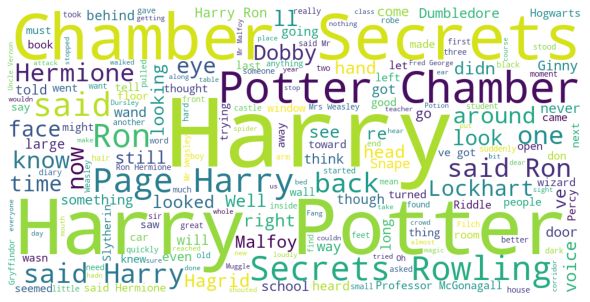

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

words = ' '.join(word_tokenize(books[1]))

stopwords = set(STOPWORDS) 
wc = WordCloud(width = 1000, height = 500, background_color ='white', stopwords = stopwords, min_font_size = 10)
wordcloud = wc.generate(words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<br><br><br><br>
<br><br><br><br>
<br><br><br><br>


# Generate Text with N-gram

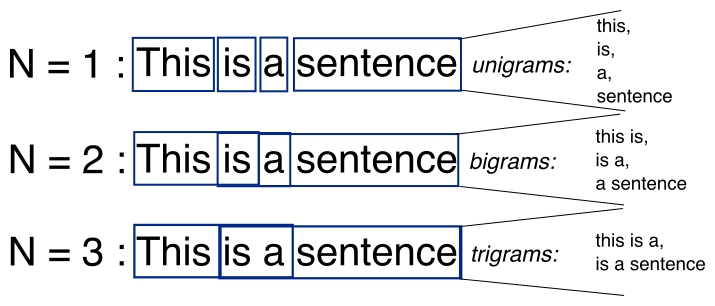

### Update NLTK

In [ ]:
!pip install -U nltk

     |████████████████████████████████| 1.4MB 8.2MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434675 sha256=cf9872fdcff5973f3053d7c1e40907b5b3c6678ec8824a3f1d0a549018b0808d
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


### Imports

In [ ]:
import nltk
from nltk import word_tokenize, sent_tokenize 
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Model

In [ ]:
# define N-gram
N = 5

# initial text
text = books[1]

# devide into sentences
sentences = sent_tokenize(text)

# devide each sentence to words
sentences_words = []
for s in sentences:
    sentences_words.append(word_tokenize(s))

# padd each sentence then create N-grams & vocabilary
train, vocab = padded_everygram_pipeline(N, sentences_words)

# create a model 
lm = MLE(N)

# train the model
lm.fit(train, vocab)

### Generate

In [ ]:
# example: generate a sentence
length = 20
sentence = lm.generate(length, text_seed=['<s>'])
' '.join(sentence)

'<s> “ You c-can ’ t — Dad told you you ’ re not to do m-magic — he said'

In [ ]:
# example: generate a couple of sentences
length = 50
sentence = []

def gen_sentence():
    sentence.append('<s>')
    sentence.extend(lm.generate(length, text_seed=sentence))

    while '<s>' in sentence:
        sentence.remove('<s>')

    while '</s>' in sentence:
        sentence.remove('</s>')

gen_sentence()
gen_sentence()
gen_sentence()
        
print(' '.join(sentence))

Filch kept it fresh in everyone ’ s minds by pacing the spot where she had been attacked , as though he were about to sprout fangs or spit poison ; tired of all the muttering , pointing , and hissing as he passed . Friends will be coming from all over the country . “ Look at his family , ” said Harry and Ron together .


### Conclusions:

- Very fast.
- If using N-Grams I should use Markov chain N-gram, as we seen in class.
- It preforms better then expected. But it's not preforming good enough. mostly due to "lack of memory".
- It feels like queting. we need to "add noise", to make it more random.
    

### References

- <a href='https://web.stanford.edu/~jurafsky/slp3/3.pdf'>N-gram Language Models</a>  
  
  
- <a href='https://www.kaggle.com/alvations/n-gram-language-model-with-nltk'>N-gram Language Model with NLTK</a> 
  
  
- <a href='https://www.kaggle.com/yasiensaf/harry-potter-nlp-pos-tagging-ngrams-word-cloud'>Harry Potter NLP - POS tagging, ngrams, word_cloud</a>


<br><br><br>
<br><br><br>
<br><br><br>

# Generate Text with LSTM - Chars
Instead of a LSTM I'm using GRU, which is still RNN but with faster training, less comutations and almost same results...

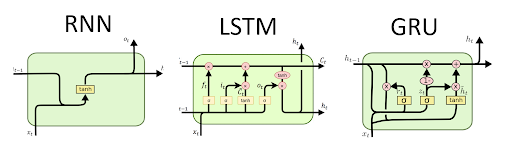

### Imports:

In [ ]:
import numpy as np

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding,GRU,Dropout,Dense

from tensorflow.keras.utils import get_file
from tensorflow.data.experimental import get_single_element

from matplotlib import pyplot as plt

### Dataset: 

In [ ]:
# from 
URLS = [
    "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%201%20-%20The%20Philosopher's%20Stone.txt",
    'https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%202%20-%20The%20Chamber%20of%20Secrets.txt',
    'https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%203%20-%20The%20Prisoner%20of%20Azkaban.txt',
    'https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%204%20-%20The%20Goblet%20of%20Fire.txt',
    'https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%205%20-%20The%20Order%20of%20the%20Phoenix.txt',
    'https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%206%20-%20The%20Half%20Blood%20Prince.txt',
    'https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%207%20-%20The%20Deathly%20Hallows.txt'
]

# get file from url, and save in cache
path_to_file = get_file('book1.txt', URLS[0])

# get text from file
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# length of text is the number of characters in it
print ('Length of text: {} characters'.format(len(text)))

# The unique characters in the file
vocab = sorted(set(text))
print ('{} unique characters'.format(len(vocab)))

Length of text: 531708 characters
86 unique characters


### Process the text

In [ ]:
# Creating a mapping from unique characters to indices
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

# convet all text to integers
text_as_int = np.array([char2idx[c] for c in text])

# The maximum length sentence we want for a single input in characters
SEQ_LENGTH = 100

# Create training examples / targets
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)   

# convert these individual characters to sequences of the desired size
sequences = char_dataset.batch(SEQ_LENGTH+1, drop_remainder=True)

# duplicate and shift it to form the input and target text
def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)

# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
BUFFER_SIZE = 10000

# get the dataset 
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

### Model

In [ ]:
# model architecture
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = Sequential(
        [
            Embedding(vocab_size, embedding_dim,batch_input_shape=[batch_size, None]),
            GRU(rnn_units,return_sequences=True,stateful=True,recurrent_initializer='glorot_uniform'),
            Dropout(0.5),
            GRU(rnn_units,return_sequences=True,stateful=True,recurrent_initializer='glorot_uniform'),
            Dropout(0.5),
            Dense(vocab_size)
        ])
    return model


# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

# create model
model = build_model(vocab_size = len(vocab),embedding_dim=embedding_dim,rnn_units=rnn_units,batch_size=BATCH_SIZE)

# sanity check
input_example_batch, target_example_batch = tf.data.experimental.get_single_element(dataset.take(1))
example_batch_predictions = model(input_example_batch)
assert example_batch_predictions.shape == (BATCH_SIZE, SEQ_LENGTH, vocab_size)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (64, None, 256)           22016     
_________________________________________________________________
gru_6 (GRU)                  (64, None, 1024)          3938304   
_________________________________________________________________
dropout_43 (Dropout)         (64, None, 1024)          0         
_________________________________________________________________
gru_7 (GRU)                  (64, None, 1024)          6297600   
_________________________________________________________________
dropout_44 (Dropout)         (64, None, 1024)          0         
_________________________________________________________________
dense_3 (Dense)              (64, None, 86)            88150     
Total params: 10,346,070
Trainable params: 10,346,070
Non-trainable params: 0
__________________________________________

### Loss & Optimizer & Train

In [ ]:
# loss function
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

# compile
model.compile(optimizer='adam', loss=loss)

# set epochs
EPOCHS = 30

# train
history = model.fit(dataset, epochs=EPOCHS)

Epoch 1/30
82/82 [==============================] - 11s 129ms/step - loss: 3.1026
Epoch 2/30
82/82 [==============================] - 11s 133ms/step - loss: 2.2484
Epoch 3/30
82/82 [==============================] - 11s 136ms/step - loss: 1.9652
Epoch 4/30
82/82 [==============================] - 11s 138ms/step - loss: 1.7858
Epoch 5/30
82/82 [==============================] - 11s 136ms/step - loss: 1.6641
Epoch 6/30
82/82 [==============================] - 11s 134ms/step - loss: 1.5756
Epoch 7/30
82/82 [==============================] - 11s 133ms/step - loss: 1.5083
Epoch 8/30
82/82 [==============================] - 11s 133ms/step - loss: 1.4545
Epoch 9/30
82/82 [==============================] - 11s 133ms/step - loss: 1.4070
Epoch 10/30
82/82 [==============================] - 11s 134ms/step - loss: 1.3712
Epoch 11/30
82/82 [==============================] - 11s 135ms/step - loss: 1.3402
Epoch 12/30
82/82 [==============================] - 11s 135ms/step - loss: 1.3088
Epoch 13/30
8

### Plot Model Loss

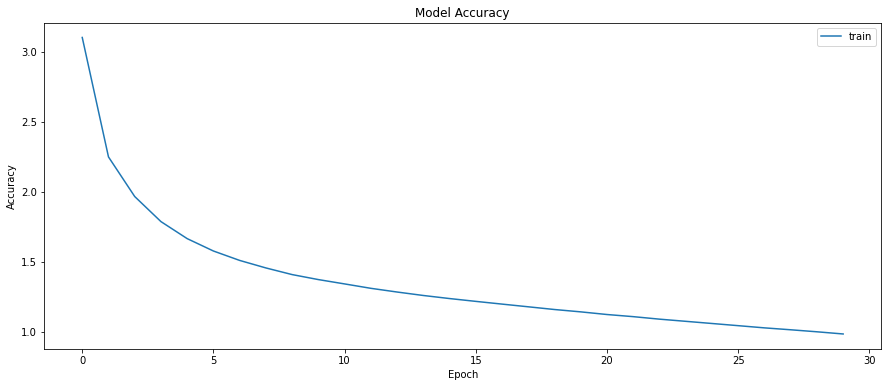

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'], loc='upper right')
plt.show();

### Generate new text

In [ ]:
def generate_text(trained_model, start_string):
    
    # important in case I use different bach size while predicting
    model = build_model(vocab_size = len(vocab),embedding_dim=embedding_dim,rnn_units=rnn_units,batch_size=1)
    model.set_weights(trained_model.get_weights()) 
    
    # Reset all the states in the RNN's layers
    # If True, the last state for each sample will be used as initial state for the sample in the following batch.
    model.reset_states()
    
    # Converting our start string to numbers (vectorizing)
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    # temperature - Low is more predictable text. High is more surprising text.
    temperature = 1.1
    
    # Empty string to store our results
    text_generated = []
    
    # Number of characters to generate
    num_generate = 1000
    
    # generate loop
    for i in range(num_generate):
        
        # convert to float
        input_eval = tf.cast(input_eval, dtype=tf.float32)
        
        # get prediction
        predictions = model(input_eval)
        
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # using a categorical distribution to predict the character returned by the model
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()

        # We pass the predicted character as the next input to the model along with the previous hidden state
        input_eval = tf.expand_dims([predicted_id], 0)

        # add char to the generated text
        text_generated.append(idx2char[predicted_id])
    
    return (start_string + ''.join(text_generated))

print(generate_text(model, start_string=u"I solemnly swear that I am up to no good. "))

I solemnly swear that I am up to no good. 
The gamekeeger gained his 
time. But now defore we had been attacked. I need 
that’s the he’d return to — two — no, — ” 

At that Cermar, Ithe pud out feel, firspind of himself, they slipped. 

“Pansitting in a chance — ” 

“It was a car, rowered it, too. It’s night, in 
me all right —” panged her fougs stupid. 
Harry’s wand out of s away forward. 

“No, thain, I, I prosh,” said Hagrid, who 
poised to be kitchen, at the ght seemed 
to be in cabertally onto the dinletched. 

“, think,” said Harry as Harry’s remember was was was hanging a 
largh, car. 

“K— yhathed important, but Ron, sweoping the I 
sitting in with mountaousy. For a wailing through the 
portrif common robes. 

All, tlike the beds of term. 

“They can’t at this dam!” said Harry to say anynd it 
vaitly as hose. we are messages ones. 

He looked very sublotly. 

“Sorry, the Ve. What is it?, Ron began anloy. At the time 
any ranevos at the moon 
painful. 

“It might is been?” said 

<br><br><br>

### Conclusions:

- Dropout makes the training time much longer when training LSTM/GRU.

- Embedding vector is better than OHE, even while using characters (ont words). Intuitive example - punctuation vs ABC.

- I should consider first train the embedding layer to learn the semantic representations of vocabs, or start with a trained embeddings. 

- For better semantic relationship learning, better keep the punctuation. Although, too many newlines(\n).

- Should spend more time in hyperparameter tuning, and consider using BLEU score for validation.

- Explore the use of autoencoder ;)

### References:

- <a href='https://adventuresinmachinelearning.com/keras-lstm-tutorial/'>Keras LSTM tutorial – How to easily build a powerful deep learning language model</a>  


- <a href='https://medium.com/towards-artificial-intelligence/create-your-own-harry-potter-short-story-using-rnn-and-tensorflow-853b3ed1b8f3'>Create Your Own Harry Potter Short Story Using RNNs and TensorFlow</a>  


- <a href='https://towardsdatascience.com/building-a-quotebot-with-machine-learning-eca39272e3b7'>Building a Harry Potter QuoteBot with Machine Learning</a>  


- <a href='https://medium.com/@patrickhk/generate-new-text-content-for-harry-potter-by-lstm-583066b47c2b'>Generate new text content for Harry Potter by LSTM</a>  


- <a href='https://www.tensorflow.org/tutorials/text/text_generation'>Text generation with an RNN</a>  


- <a href='https://github.com/asmitakulkarni/QuoteGenerator/blob/master/04_LSTM_Char_Level.ipynb'>QuoteGenerator</a>



<br><br><br>
<br><br><br>
<br><br><br>


# Generate Text with GPT2

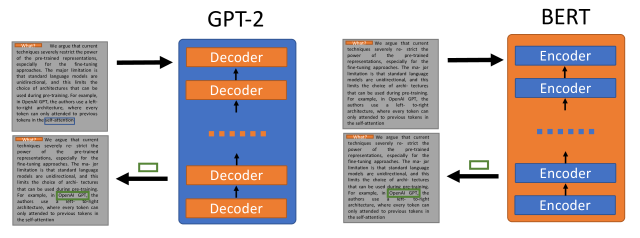

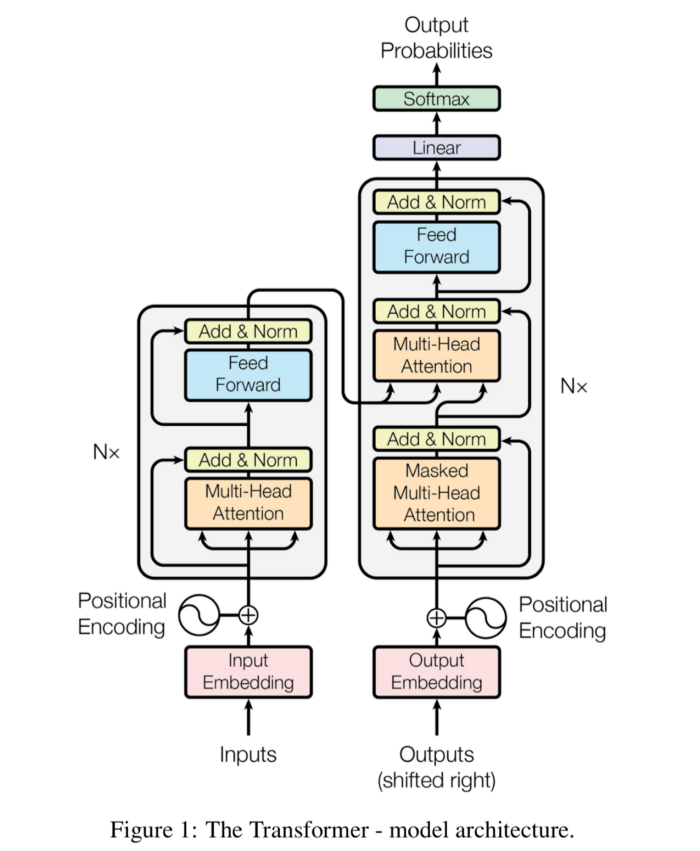

### Install Transformers

In [ ]:
!pip install transformers

     |████████████████████████████████| 1.3MB 7.1MB/s 
     |████████████████████████████████| 890kB 46.7MB/s 
     |████████████████████████████████| 2.9MB 50.8MB/s 
     |████████████████████████████████| 1.1MB 51.7MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=8d84cc1f8b046cadd3286697c6f56976c9ef4dd5525c6f7fb1572be3cc624371
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


### Import pipeline

In [ ]:
from transformers import pipeline 

pipeline('sentiment-analysis')('I hate you')


[{'label': 'NEGATIVE', 'score': 0.9991129040718079}]

### Download Tokenizer & Model

In [ ]:
import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer


tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# add the EOS token as PAD token to avoid warnings
model = TFGPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

# encode context the generation is conditioned on
input_ids = tokenizer.encode('I enjoy walking with my cute dog', return_tensors='tf')



All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


### Generate (different ways)

In [ ]:
# generate text until the output length (which includes the context length) reaches 50
greedy_output = model.generate(input_ids, max_length=50)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(greedy_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with my dog. I'm not sure if I'll ever be able to walk with my dog.

I'm not sure if I'll


In [ ]:
beam_output = model.generate(
    input_ids, 
    max_length=50, 
    num_beams=5, 
    early_stopping=True
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I'm not sure if I'll ever be able to walk with him again. I'm not sure if I'll


In [ ]:
beam_output = model.generate(
    input_ids, 
    max_length=50, 
    num_beams=5, 
    no_repeat_ngram_size=2, 
    early_stopping=True
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I've been thinking about this for a while now, and I think it's time for me to take a break


In [ ]:
# set return_num_sequences > 1
beam_outputs = model.generate(
    input_ids, 
    max_length=50, 
    num_beams=5, 
    no_repeat_ngram_size=2, 
    num_return_sequences=5, 
    early_stopping=True
)

# now we have 3 output sequences
print("Output:\n" + 100 * '-')
for i, beam_output in enumerate(beam_outputs):
  print("{}: {}".format(i, tokenizer.decode(beam_output, skip_special_tokens=True)))

Output:
----------------------------------------------------------------------------------------------------
0: I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I've been thinking about this for a while now, and I think it's time for me to take a break
1: I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I've been thinking about this for a while now, and I think it's time for me to get back to
2: I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with her again.

I've been thinking about this for a while now, and I think it's time for me to take a break
3: I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with her again.

I've been thinking about this for a while now, and I think it's time for me to get back to
4: I enjoy walking with my cute dog, but I'm not sure if I'll ever be able to walk with him again.

I've been thinking about 

In [ ]:
tf.random.set_seed(0)

# activate sampling and deactivate top_k by setting top_k sampling to 0
sample_output = model.generate(
    input_ids, 
    do_sample=True, 
    max_length=50, 
    top_k=0
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog because of myself.

Bryan: Oh, it's edgy.

Rachel: Does your dog love weddings?

Bryan: He won't, because he wants to

Rachel:


In [ ]:
tf.random.set_seed(0)

# use temperature to decrease the sensitivity to low probability candidates
sample_output = model.generate(
    input_ids, 
    do_sample=True, 
    max_length=50, 
    top_k=0, 
    temperature=0.7
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog because he is a human being, and I love to play with him at night. I do not share his name with anyone outside of the family."

- Judy, Lillian and Ryan

"[A


In [ ]:
tf.random.set_seed(0)

# set top_k to 50
sample_output = model.generate(
    input_ids, 
    do_sample=True, 
    max_length=50, 
    top_k=50
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog because of the warmth and safety that comes with it," says Mary Anne Anderson.

Anderson is a retired veterinarian with a passion for the care of animals and the environment, helping to manage landfills and land


In [ ]:
tf.random.set_seed(0)

# deactivate top_k sampling and sample only from 92% most likely words
sample_output = model.generate(
    input_ids, 
    do_sample=True, 
    max_length=50, 
    top_p=0.92, 
    top_k=0
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog because of the security and safety, and she wasn't scared by the obstacles. But so do her two grown-ups and now she's over scared by the amount of metal there is."

It might seem


In [ ]:
tf.random.set_seed(0)

# set top_k = 50 and set top_p = 0.95 and num_return_sequences = 3
sample_outputs = model.generate(
    input_ids,
    do_sample=True, 
    max_length=50, 
    top_k=50, 
    top_p=0.95, 
    num_return_sequences=3
)

print("Output:\n" + 100 * '-')
for i, sample_output in enumerate(sample_outputs):
  print("{}: {}".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))

Output:
----------------------------------------------------------------------------------------------------
0: I enjoy walking with my cute dog because of the warmth and safety that comes with it," says Mary Anne Meehan, whose husband, Terry, is a mechanic. "He loves being around people, doing chores." Mary Anne, 58, and
1: I enjoy walking with my cute dog, so he was excited that I was going to show him the door," Coughlin wrote to a friend. "So excited and excited that after 10 minutes we went to the door. It is a great little
2: I enjoy walking with my cute dog and I am a regular walking partner. We do both walking and cycling daily. I don't like driving, but I do like having a nice home environment! I can only say I am a happy camper too


**get something about Harry potter without training it...**

In [ ]:
input_ids = tokenizer.encode('Harry Potter', return_tensors='tf')

sample_outputs = model.generate(
    input_ids,
    do_sample=True, 
    max_length=50, 
    top_k=50, 
    top_p=0.95, 
    num_return_sequences=3
)

print("Output:\n" + 100 * '-')
for i, sample_output in enumerate(sample_outputs):
      print("{}: {}".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))

Output:
----------------------------------------------------------------------------------------------------
0: Harry Potter was a bit too easy.

Harry wondered what a wizard's mind was like. He didn't know how he had come to be so much a wizard, just that he hadn't grown to know it. He figured that Dumbledore would
1: Harry Potter and the Philosopher's Stone"

Harry (the Professor): "When we entered the Forbidden Forest, I heard the bell ring. I knew what it meant because of the spell I was making, so I went up to it."
2: Harry Potter's Adventures", by Thomas L. Allen. This book contains many references to the books Harry Potter and the Half-Blood Prince, especially those referenced by Dumbledore. Also included in this book are an array of "magic" items:



<br><br>

**Now that I know how to use a trained GPT-2 model, let's try something else...**   